In [1]:
import sys
sys.path.append("TernausNetV2/")
sys.path.append("..")

In [32]:
from imp import reload
import models

import numpy as np

from torch.optim import Adam
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader
import torch.backends.cudnn as cudnn
import torch.backends.cudnn

reload(models)

from models.ternausnet2 import TernausNetV2
import model
reload(model)
from model.datasets import PairedTiles
import albumentations as A
from numpy import array, floor
from numpy.random import randint
reload(models)

<module 'models' from 'TernausNetV2/models/__init__.py'>

In [3]:
model = TernausNetV2(num_classes=1, num_input_channels=4)



In [4]:

#
mean = array([[[8237.95084794]],

               [[6467.98702156]],

               [[6446.61743148]],

               [[4520.95360105]]])

std  = array([[[12067.03414753]],

               [[ 8810.00542703]],

               [[10710.64289882]],

               [[ 9024.92028515]]])

transform = A.Compose([
    #A.ToFloat(p = 1),
    # A.RandomRotate90(p = 0.5),
    # A.RandomRotate90(p = 0.5),
    # A.RandomRotate90(p = 0.5), #these do something bad to the bands
    A.Normalize(mean = mean, std = std, max_pixel_value = 1),
    A.HorizontalFlip(p = 0.5),
    A.VerticalFlip(p = 0.5),
    A.ToFloat(p = 1)
])




In [5]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

args = Namespace(lr= 0.2, n_epochs=10, root = 'runs/debug', batch_size=1)

In [73]:
data = PairedTiles("/home/ubuntu/pre_tester/out/images/", "/home/ubuntu/pre_tester/out/mask/")

num_images = len(data)

all_indices = set(range(num_images))

num_train = int(floor(num_images * 0.7))

train_indices = randint(0, num_images, num_train)

test_indices = all_indices - set(train_indices)

SyntaxError: invalid syntax (<ipython-input-73-4fba1b6b044e>, line 1)

In [75]:
train = PairedTiles("/home/ubuntu/pre_tester/out/images/", "/home/ubuntu/pre_tester/out/mask/", joint_transform=transform, indices=train_indices)
valid = PairedTiles("/home/ubuntu/pre_tester/out/images/", "/home/ubuntu/pre_tester/out/mask/", joint_transform=transform, indices=test_indices)
train[0]

(tensor([[[[ 4.7070e-01,  4.2295e-01,  4.1331e-01,  ..., -5.0094e-01,
            -5.0094e-01, -5.0094e-01],
           [ 4.9774e-01,  5.4317e-01,  5.2721e-01,  ..., -5.0094e-01,
            -5.0094e-01, -5.0094e-01],
           [ 4.8079e-01,  5.5547e-01,  5.4328e-01,  ..., -5.0094e-01,
            -5.0094e-01, -5.0094e-01],
           ...,
           [-5.0094e-01, -5.0094e-01, -5.0094e-01,  ...,  4.5324e-02,
             5.2083e-02,  2.3274e-02],
           [-5.0094e-01, -5.0094e-01, -5.0094e-01,  ...,  6.4826e-02,
             6.3828e-02,  2.7706e-02],
           [-5.0094e-01, -5.0094e-01, -5.0094e-01,  ...,  1.1861e-02,
             8.2047e-03, -2.3264e-02]],
 
          [[ 5.4603e-01,  4.0655e-01,  4.9543e-01,  ..., -6.0189e-01,
            -6.0189e-01, -6.0189e-01],
           [ 6.3679e-01,  6.0233e-01,  5.1868e-01,  ..., -6.0189e-01,
            -6.0189e-01, -6.0189e-01],
           [ 5.9290e-01,  6.8646e-01,  5.3539e-01,  ..., -6.0189e-01,
            -6.0189e-01, -6.0189e-01],


In [8]:
from loss import LossBinary
from validation import validation_binary
import utils

In [9]:
model = nn.DataParallel(model, device_ids=[0]).cuda()


In [10]:
loss = LossBinary(jaccard_weight=0.5)



utils.train(
    init_optimizer=lambda lr: Adam(model.parameters(), lr=lr),
    args=args,
    model=model,
    criterion=loss,
    train_loader=train,
    valid_loader=valid,
    validation=validation_binary,
    fold=0,
    num_classes=1
)

Epoch 2, lr 0.2:   0%|          | 0/6 [00:00<?, ?it/s]

Valid loss: 6.51734, jaccard: 0.10262


Epoch 3, lr 0.2:   0%|          | 0/6 [00:00<?, ?it/s]

Valid loss: 6.54266, jaccard: 0.10262


Epoch 4, lr 0.2:   0%|          | 0/6 [00:00<?, ?it/s]

Valid loss: 6.49769, jaccard: 0.10262


Epoch 5, lr 0.2:   0%|          | 0/6 [00:00<?, ?it/s]

Valid loss: 6.45309, jaccard: 0.10262


Epoch 6, lr 0.2:   0%|          | 0/6 [00:00<?, ?it/s]

Valid loss: 6.43130, jaccard: 0.10262


Epoch 7, lr 0.2:   0%|          | 0/6 [00:00<?, ?it/s]

Valid loss: 6.43012, jaccard: 0.10262


Epoch 8, lr 0.2:   0%|          | 0/6 [00:00<?, ?it/s]

Valid loss: 6.43984, jaccard: 0.10262


Epoch 9, lr 0.2:   0%|          | 0/6 [00:00<?, ?it/s]

Valid loss: 6.45078, jaccard: 0.10262


Epoch 10, lr 0.2:   0%|          | 0/6 [00:00<?, ?it/s]

Valid loss: 6.45705, jaccard: 0.10262


Epoch 10, lr 0.2: 100%|██████████| 6/6 [00:08<00:00,  1.42s/it, loss=1.72336]


Valid loss: 6.45768, jaccard: 0.10262


In [11]:

train[5][1].unsqueeze((0,1))

TypeError: unsqueeze(): argument 'dim' (position 1) must be int, not tuple

TypeError: Invalid dimensions for image data

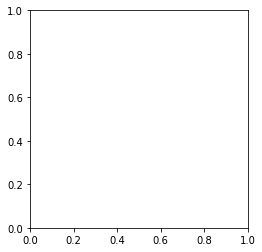

In [26]:
import matplotlib.pyplot as plt

plt.imshow(model(train[0][0]).cpu().detach().numpy())


<Figure size 1440x1440 with 0 Axes>

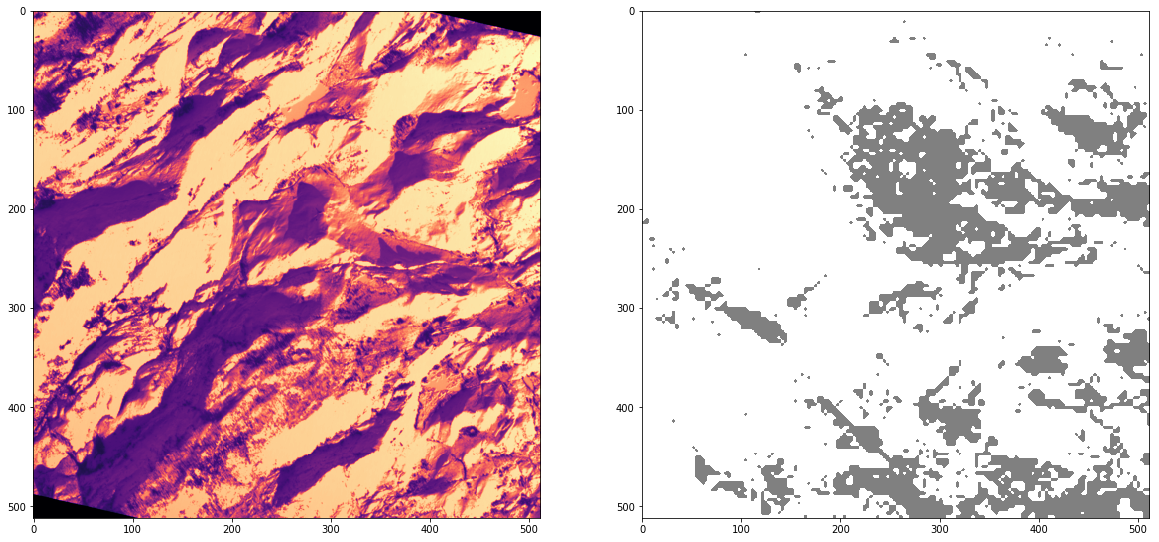

In [84]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots(1, 2, figsize=(20,20))
ax[0].imshow(np.squeeze(train[0][0].numpy())[3], cmap='magma')
ax[1].imshow(np.squeeze(train[0][1].numpy()), alpha=0.5, cmap='binary')